In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

Dataset/Dataframe Load


In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

,job_skills,job_title_short,skills_count
546,sql,Data Engineer,108
545,sql,Data Analyst,105
425,python,Data Engineer,101
39,aws,Software Engineer,92
235,java,Software Engineer,92
...,...,...,...
498,scikit-learn,Senior Data Engineer,1
226,hugging face,Machine Learning Engineer,1
500,seaborn,Senior Data Engineer,1
501,selenium,Business Analyst,1


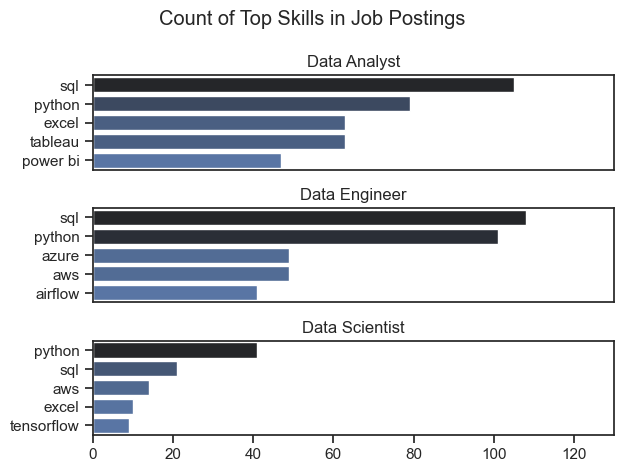

In [14]:
df_Serbia = df[df['job_country'] == 'Serbia']
df_skills = df_Serbia.explode('job_skills')


df_skills_count = df_skills.groupby(['job_skills', 'job_title_short'])['job_skills'].size()
df_skills_count = df_skills_count.reset_index(name='skills_count').sort_values('skills_count', ascending=False)

job_titles = sorted(['Data Scientist', 'Data Analyst', 'Data Engineer'])

fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax = ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skills_count', y='job_skills', hue='skills_count', ax = ax[i], palette="dark:b_r")
    #ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_xlim(0, 130)
    ax[i].legend().set_visible(False)

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Count of Top Skills in Job Postings')
fig.tight_layout()
df_skills_count




In [13]:
df_jobs_title_count = df_Serbia['job_title_short'].value_counts().reset_index(name='jobs_total')
df_jobs_title_count


,job_title_short,jobs_total
0,Software Engineer,238
1,Data Analyst,195
2,Data Engineer,167
3,Business Analyst,151
4,Data Scientist,86
5,Senior Data Engineer,64
6,Cloud Engineer,43
7,Machine Learning Engineer,36
8,Senior Data Analyst,25
9,Senior Data Scientist,21


In [5]:
df_skills_perc = pd.merge(df_skills_count, df_jobs_title_count, how='left', on='job_title_short')
df_skills_perc['skills_perc'] = 100 * df_skills_perc['skills_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skills_count,jobs_total,skills_perc
0,sql,Data Engineer,108,167,64.670659
1,sql,Data Analyst,105,195,53.846154
2,python,Data Engineer,101,167,60.479042
3,aws,Software Engineer,92,238,38.655462
4,java,Software Engineer,92,238,38.655462
...,...,...,...,...,...
632,scikit-learn,Senior Data Engineer,1,64,1.562500
633,hugging face,Machine Learning Engineer,1,36,2.777778
634,seaborn,Senior Data Engineer,1,64,1.562500
635,selenium,Business Analyst,1,151,0.662252


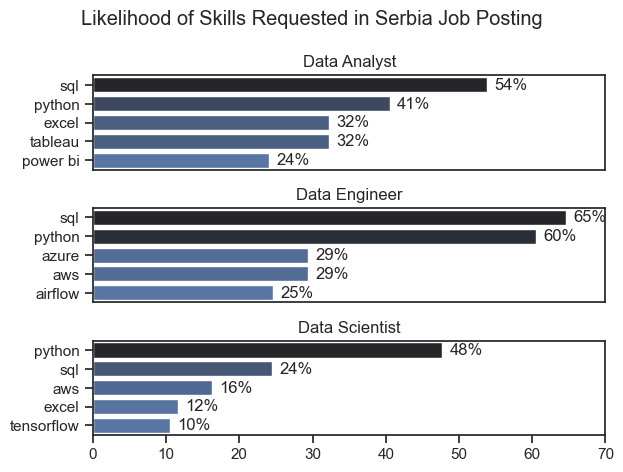

In [6]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skills_perc', ax = ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skills_perc', y='job_skills', hue='skills_count',  ax = ax[i], palette='dark:b_r')
    #ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].set_title(job_title)
    ax[i].legend().set_visible(False)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 70)

    for n, v in enumerate(df_plot['skills_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in Serbia Job Posting')
fig.tight_layout()
plt.show()